## Setup

In [13]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

Reading data into a dataframe, and renaming columns to work with functions:

In [14]:
evdata = pd.read_csv('Electric_Vehicle_Population_Data.csv')
evdata = evdata.rename(columns = {'Electric Vehicle Type' : 'EVT'})
evdata = evdata.rename(columns = {'Model Year' : 'Mdlyr'})
evdata.columns.values

array(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Mdlyr',
       'Make', 'Model', 'EVT',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District',
       'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
       '2020 Census Tract'], dtype=object)

Creating separate dataframes for each vehicle type:

In [15]:
elecs = evdata.loc[evdata.EVT == 'Battery Electric Vehicle (BEV)']
hybrids = evdata.loc[evdata.EVT == 'Plug-in Hybrid Electric Vehicle (PHEV)']

Checking which years were in the dataset:

In [16]:
evdata.Mdlyr.unique()

array([2020, 2019, 2021, 2017, 2015, 2018, 2013, 2016, 2022, 2011, 2012,
       2023, 2014, 2008, 2010, 2000, 1999, 1998, 2002, 2003, 1997])

Creating list with all of the model years, and creating a list with the sums for each year of registered hybrid vehicles:

In [17]:
yr_list = [1997, 1998, 1999, 2000, 2002, 2003, 2008, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
hyb_list = list()
h_list = list()
for yr in range(1997, 2024):
    if yr in yr_list:
        val = hybrids.loc[hybrids.Mdlyr == yr]
        hyb_list.append(val)
        h_list.append(len(val))

Creating list of yearly sums for registered fully electric vehicles:

In [18]:
ele_list = list()
e_list = list()
for yr in range(1997, 2024):
    if yr in yr_list:
        val = elecs.loc[elecs.Mdlyr == yr]
        ele_list.append(val)
        e_list.append(len(val))
    

Stitching data from each list together in a list of dictionaries:

In [19]:
yrlyev = {'Year': yr_list,
          'Hybrids': h_list,
         'Electrics': e_list}

Turning the list of dictionaries into a dataframe:

In [20]:
evyr_df = pd.DataFrame(data=yrlyev)

## Data

In [21]:
display(evyr_df)

,Year,Hybrids,Electrics
0,1997,0,1
1,1998,0,1
2,1999,0,4
3,2000,0,9
4,2002,0,2
5,2003,0,1
6,2008,0,22
7,2010,3,21
8,2011,75,753
9,2012,870,798


Using dataframe to create a stacked plot of hybrids and electric vehicles vs model year:

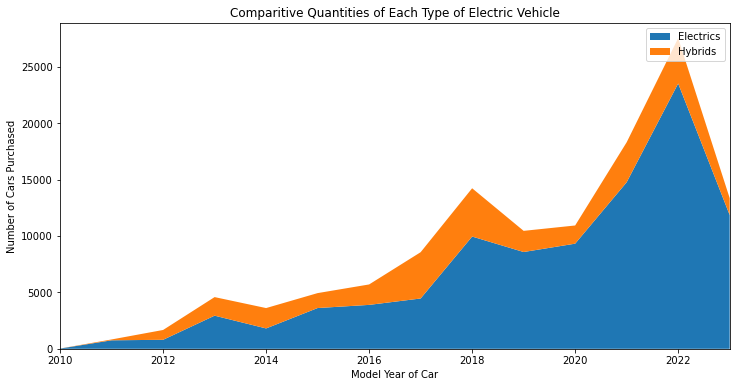

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data
# ax.plot(elecs['Model Year'], elecs['northbound pedestrians'], label='Full Electric Vehicles')
# ax.plot(hybrids['Model Year'], hybrids['southbound pedestrians'], label='Hybrid Vehicles')

ax.stackplot(evyr_df['Year'], evyr_df['Electrics'], evyr_df['Hybrids'], labels=['Electrics', 'Hybrids'])
ax.set_title('Comparitive Quantities of Each Type of Electric Vehicle')
ax.set_xlabel('Model Year of Car')
ax.set_ylabel('Number of Cars Purchased')
ax.legend()
plt.xlim(left = 2010)
plt.xlim(right = 2023)
plt.show()

## Scrapped Shit

In [6]:
# hyb97 = hybrids.loc[hybrids.Mdlyr == 1997]
# h97 = len(hyb97)
# hyb98 = hybrids.loc[hybrids.Mdlyr == 1998]
# h98 = len(hyb98)
# hyb99 = hybrids.loc[hybrids.Mdlyr == 1999]
# h99 = len(hyb99)
# hyb00 = hybrids.loc[hybrids.Mdlyr == 2000]
# h00 = len(hyb00)
# hyb02 = hybrids.loc[hybrids.Mdlyr == 2002]
# h02 = len(hyb02)
# hyb03 = hybrids.loc[hybrids.Mdlyr == 2003]
# h03 = len(hyb03)
# hyb08 = hybrids.loc[hybrids.Mdlyr == 2008]
# h08 = len(hyb08)
# hyb10 = hybrids.loc[hybrids.Mdlyr == 2010]
# h10 = len(hyb10)
# hyb11 = hybrids.loc[hybrids.Mdlyr == 2011]
# h11 = len(hyb11)
# hyb12 = hybrids.loc[hybrids.Mdlyr == 2012]
# h12 = len(hyb12)
# hyb13 = hybrids.loc[hybrids.Mdlyr == 2013]
# h13 = len(hyb13)
# hyb14 = hybrids.loc[hybrids.Mdlyr == 2014]
# h14 = len(hyb14)
# hyb15 = hybrids.loc[hybrids.Mdlyr == 2015]
# h15 = len(hyb15)
# hyb16 = hybrids.loc[hybrids.Mdlyr == 2016]
# h16 = len(hyb16)
# hyb17 = hybrids.loc[hybrids.Mdlyr == 2017]
# h17 = len(hyb17)
# hyb18 = hybrids.loc[hybrids.Mdlyr == 2018]
# h18 = len(hyb18)
# hyb19 = hybrids.loc[hybrids.Mdlyr == 2019]
# h19 = len(hyb19)
# hyb20 = hybrids.loc[hybrids.Mdlyr == 2020]
# h20 = len(hyb20)
# hyb21 = hybrids.loc[hybrids.Mdlyr == 2021]
# h21 = len(hyb21)
# hyb22 = hybrids.loc[hybrids.Mdlyr == 2022]
# h22 = len(hyb22)
# hyb23 = hybrids.loc[hybrids.Mdlyr == 2023]
# h23 = len(hyb23)

In [7]:
# ele97 = elecs.loc[elecs.Mdlyr == 1997]
# ele98 = elecs.loc[elecs.Mdlyr == 1998]
# ele99 = elecs.loc[elecs.Mdlyr == 1999]
# ele00 = elecs.loc[elecs.Mdlyr == 2000]
# ele02 = elecs.loc[elecs.Mdlyr == 2002]
# ele03 = elecs.loc[elecs.Mdlyr == 2003]
# ele08 = elecs.loc[elecs.Mdlyr == 2008]
# ele10 = elecs.loc[elecs.Mdlyr == 2010]
# ele11 = elecs.loc[elecs.Mdlyr == 2011]
# ele12 = elecs.loc[elecs.Mdlyr == 2012]
# ele13 = elecs.loc[elecs.Mdlyr == 2013]
# ele14 = elecs.loc[elecs.Mdlyr == 2014]
# ele15 = elecs.loc[elecs.Mdlyr == 2015]
# ele16 = elecs.loc[elecs.Mdlyr == 2016]
# ele17 = elecs.loc[elecs.Mdlyr == 2017]
# ele18 = elecs.loc[elecs.Mdlyr == 2018]
# ele19 = elecs.loc[elecs.Mdlyr == 2019]
# ele20 = elecs.loc[elecs.Mdlyr == 2020]
# ele21 = elecs.loc[elecs.Mdlyr == 2021]
# ele22 = elecs.loc[elecs.Mdlyr == 2022]
# ele23 = elecs.loc[elecs.Mdlyr == 2023]
# e97 = len(ele97)
# e98 = len(ele98)
# e99 = len(ele99)
# e00 = len(ele00)
# e02 = len(ele02)
# e03 = len(ele03)
# e08 = len(ele08)
# e10 = len(ele10)
# e11 = len(ele11)
# e12 = len(ele12)
# e13 = len(ele13)
# e14 = len(ele14)
# e15 = len(ele15)
# e16 = len(ele16)
# e17 = len(ele17)
# e18 = len(ele18)
# e19 = len(ele19)
# e20 = len(ele20)
# e21 = len(ele21)
# e22 = len(ele22)
# e23 = len(ele23)